In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [2]:
df_raw = pd.read_csv("rawdata/통신고객이탈.csv")
df_raw.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [3]:
import numpy as np
df_raw["CHURN"] = np.where(df_raw["CHURN"] == "Active", 0, 1)
df_raw["GENDER"] = np.where(df_raw["GENDER"] == "F", 0, 1)
df_raw = df_raw.drop(["CUSTOMER_ID"], axis = 1)

df_raw.head()

,CHURN,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0,0,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,0,1,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,0,1,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,0,1,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,0,0,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [4]:
df_raw = pd.get_dummies(df_raw)

In [5]:
df_train, df_test = train_test_split(df_raw, test_size = 0.3, random_state = 1234)

In [6]:
df_train_y = df_train["CHURN"]
df_train_x = df_train.drop(["CHURN"], axis = 1)
df_test_y = df_test["CHURN"]
df_test_x = df_test.drop(["CHURN"], axis = 1)

In [7]:
rf_uncustomized = GradientBoostingClassifier(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)

print("Accuracy on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

# 과대적합

Accuracy on training set: 0.971
Accuracy on test set: 0.885


In [8]:
train_accuracy = []; test_accuracy = []

para_lr = [lr * 0.1 for lr in range (1, 30)]

for v_learning_rate in para_lr:
    gb = GradientBoostingClassifier(learning_rate = v_learning_rate, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
df_accuracy_lr = pd.DataFrame()
df_accuracy_lr["LearningRate"] = para_lr
df_accuracy_lr["TrainAccuracy"] = train_accuracy
df_accuracy_lr["TestAccuracy"] = test_accuracy

df_accuracy_lr.round(3)

,LearningRate,TrainAccuracy,TestAccuracy
0,0.1,0.971,0.885
1,0.2,0.998,0.885
2,0.3,1.000,0.892
3,0.4,1.000,0.864
4,0.5,1.000,0.875
5,0.6,1.000,0.882
6,0.7,1.000,0.867
7,0.8,1.000,0.882
8,0.9,1.000,0.853
9,1.0,1.000,0.864


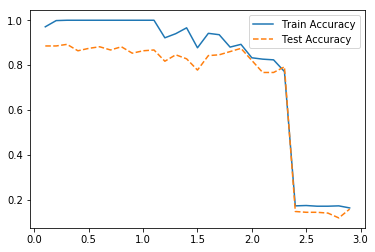

In [9]:
plt.plot(para_lr, train_accuracy, linestyle = '-', label = "Train Accuracy")
plt.plot(para_lr, test_accuracy, linestyle = '--', label = "Test Accuracy")
plt.legend()

In [10]:
train_accuracy = []; test_accuracy = []

para_n_tree = [n_tree * 10 for n_tree in range(1, 30)]

for v_n_estimator in para_n_tree:
    rf = GradientBoostingClassifier(learning_rate = 0.1, n_estimators = v_n_estimator, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimator"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy

df_accuracy_n.round(3)

,n_estimator,TrainAccuracy,TestAccuracy
0,10,0.879,0.892
1,20,0.916,0.900
2,30,0.931,0.918
3,40,0.935,0.914
4,50,0.943,0.903
5,60,0.951,0.900
6,70,0.952,0.896
7,80,0.957,0.892
8,90,0.963,0.889
9,100,0.971,0.885


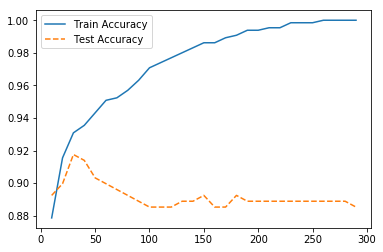

In [11]:
plt.plot(para_n_tree, train_accuracy, linestyle = '-', label = "Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = '--', label = "Test Accuracy")
plt.legend()

In [12]:
train_accuracy = []; test_accuracy = []

para_depth = [depth for depth in range (1, 21)]

for v_max_depth in para_depth:
    rf = GradientBoostingClassifier(learning_rate = 0.1, n_estimators = 30, max_depth = v_max_depth, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.871,0.896
1,2,0.909,0.900
2,3,0.931,0.918
3,4,0.942,0.896
4,5,0.955,0.892
5,6,0.966,0.892
6,7,0.985,0.889
7,8,0.994,0.889
8,9,1.000,0.878
9,10,1.000,0.882


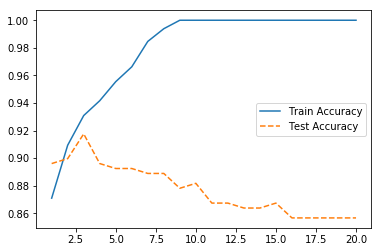

In [13]:
plt.plot(para_depth, train_accuracy, linestyle = '-', label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = '--', label = "Test Accuracy")
plt.legend()

In [14]:
train_accuracy = []; test_accuracy = []

para_split = [n_split * 10 for n_split in range (2, 16)]

for v_min_samples_split in para_split:
    rf = GradientBoostingClassifier(min_samples_split = v_min_samples_split, learning_rate = 0.1, n_estimators = 30, 
                                    max_depth = 3, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,20,0.920,0.900
1,30,0.912,0.921
2,40,0.912,0.918
3,50,0.906,0.914
4,60,0.911,0.921
5,70,0.909,0.921
6,80,0.909,0.921
7,90,0.909,0.914
8,100,0.902,0.918
9,110,0.902,0.918


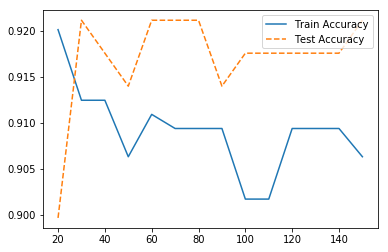

In [15]:
plt.plot(para_split, train_accuracy, linestyle = '-', label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = '--', label = "Test Accuracy")
plt.legend()

In [16]:
train_accuracy = []; test_accuracy = []

para_leaf = [n_leaf * 10 for n_leaf in range (1, 16)]

for v_min_samples_leaf in para_leaf:
    rf = GradientBoostingClassifier(min_samples_leaf = v_min_samples_leaf, min_samples_split = 30, learning_rate = 0.1, 
                                    n_estimators = 30, max_depth = 3, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesSplit"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

df_accuracy_leaf.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.911,0.918
1,20,0.906,0.914
2,30,0.899,0.892
3,40,0.899,0.896
4,50,0.826,0.828
5,60,0.819,0.849
6,70,0.803,0.835
7,80,0.799,0.846
8,90,0.803,0.839
9,100,0.797,0.842


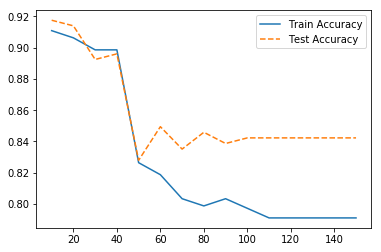

In [17]:
plt.plot(para_leaf, train_accuracy, linestyle = '-', label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = '--', label = "Test Accuracy")
plt.legend()

In [18]:
gb_final = GradientBoostingClassifier(min_samples_leaf = 10, min_samples_split = 30, learning_rate = 0.1, 
                                    n_estimators = 30, max_depth = 3, random_state = 1234)

gb_final.fit(df_train_x, df_train_y)

y_pred = gb_final.predict(df_test_x)

print("Accuracy on training set: %.3f" % gb_final.score(df_train_x, df_train_y))
print("Accuracy on test set\t: %.3f" % gb_final.score(df_test_x, df_test_y))
print("Confusion matrix")
print(confusion_matrix(df_test_y, y_pred))

Accuracy on training set: 0.911
Accuracy on test set	: 0.918
Confusion matrix
[[227   8]
 [ 15  29]]


In [19]:
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_

df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
16,HANDSET_ASAD90,0.317
3,DROPPED_CALLS,0.216
19,HANDSET_CAS30,0.143
5,PEAK_CALLS_TIME,0.097
2,SERVICE_DURATION,0.072
9,TOTAL_CALLS_TIME,0.070
21,HANDSET_S50,0.016
13,CHARGE_TYPE_Play 100,0.015
1,AGE,0.013
25,HANDSET_WC95,0.010


Text(0, 0.5, 'Feature')

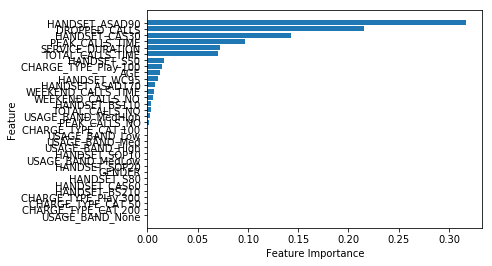

In [20]:
df_importance.sort_values("Importance", ascending= True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")

In [ ]:
estimator = GradientBoostingClassifier(random_state = 1234)

param_grid = {
    "learning rate"    : para_lr,
    "max_depth"        : para_depth,
    "min_samples_leaf" : para_leaf,
}

grid_gb = GridSearchCV(estimator, param_grid, scoring= "accuracy", n_jobs = -1)
grid_gb.fit(df_train_x, df_train_y)
print("Best estimator model:")
print(grid_gb.best_estimator_)
print("\nBest parameter:")
print(grid_gb.best_params_)
print("\nBest score:")
print(grid_gb.best_score_.round(3))